In [11]:
import functools

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib as plt

import optuna

from sklearn import datasets
import sklearn.datasets
import sklearn.metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import functools
import xgboost as xgb
import psutil
import time

In [15]:
df = pd.read_csv('../data/dataset/DTX_data_002.csv')
df2 = pd.read_csv('../data/dataset/DTX_data_003.csv')

In [20]:
display(df.head())
display(df2.head())

print(len(df))
print(len(df2))

,금연성공여부,연령,흡연시작연령,하루흡연량,담배종류_1,담배종류_2,담배종류_4,담배종류_5,담배종류_6,담배종류_7,...,FTND_4,FTND_5,FTND_6,FTND_7,FTND_8,FTND_9,FTND_10,흡연기간연도,청소년흡연경험,의존도판정
0,0,52,25,3,1,0,0,0,0,0,...,0,0,0,0,1,0,0,27,0,3
1,0,32,17,4,1,0,0,0,0,0,...,0,0,0,1,0,0,0,15,1,3
2,1,41,21,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,20,0,1
3,1,60,18,2,1,0,0,0,0,0,...,0,0,1,0,0,0,0,42,1,2
4,1,28,19,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,9,1,1


,금연성공여부,성별,연령,연령대,흡연시작연령,흡연기간연도,청소년흡연경험,담배종류,담배종류개수,하루흡연량,1갑초과여부,FTND,의존도판정
0,0,1,52,50,3.218876,27,0,1,1,3,0,8,3
1,0,1,32,30,2.833213,15,1,1,1,4,1,7,3
2,1,1,41,40,3.044522,20,0,1,1,2,0,0,1
3,1,1,60,60,2.890372,42,1,1,1,2,0,6,2
4,1,1,28,20,2.944439,9,1,4,2,2,0,2,1


1055
1055


In [19]:
df = pd.concat([df,df2['흡연기간연도'],df2['청소년흡연경험'],df2['의존도판정']],axis=1)

In [21]:
X = df.drop(['금연성공여부'],axis=1)
y = df['금연성공여부']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, shuffle=True,  random_state=34)

In [47]:
from xgboost import XGBClassifier


def objective(trial):

    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 50),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 1, 100, 1),
        'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
        # 'reg_alpha': trial.suggest_int('reg_alpha', 1, 50),
        # 'reg_lambda': trial.suggest_int('reg_lambda', 5, 100),
        # 'min_child_weight': trial.suggest_int('min_child_weight', 2, 20),
        # "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1.0),
    }

    model = XGBClassifier(**param, random_state =42 )
    model.fit(X_train, y_train,eval_set=[(X_valid,y_valid)], early_stopping_rounds=150,verbose=False)
    preds = model.predict(X_valid)
    acc = accuracy_score(y_valid, preds)
    return acc

In [48]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-05-25 10:23:39,926] A new study created in memory with name: no-name-ca044b9d-a977-4881-88b9-0b037dd5a0fc
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-05-25 10:23:39,983] Trial 0 finished with value: 0.6320754716981132 and parameters: {'max_depth': 6, 'subsample': 0.6, 'n_estimators': 19, 'eta': 0.03}. Best is trial 0 with value: 0.6320754716981132.
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-05-25 10:23:40,064] Trial 1 finished with value: 0.6132075471698113 and parameters: {'max

/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-05-25 10:23:41,812] Trial 16 finished with value: 0.660377358490566 and parameters: {'max_depth': 1, 'subsample': 0.75, 'n_estimators': 46, 'eta': 0.08}. Best is trial 6 with value: 0.660377358490566.
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-05-25 10:23:41,835] Trial 17 finished with value: 0.6132075471698113 and parameters: {'max_depth': 12, 'subsample': 0.8, 'n_estimators': 6, 'eta': 0.08}. Best is trial 6 with value: 0.660377358490566.
/U

/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-05-25 10:23:42,919] Trial 32 finished with value: 0.6320754716981132 and parameters: {'max_depth': 5, 'subsample': 0.6, 'n_estimators': 34, 'eta': 0.060000000000000005}. Best is trial 6 with value: 0.660377358490566.
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-05-25 10:23:42,940] Trial 33 finished with value: 0.5566037735849056 and parameters: {'max_depth': 40, 'subsample': 0.8, 'n_estimators': 2, 'eta': 0.03}. Best is trial 6 with value: 0.660

/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-05-25 10:23:43,900] Trial 48 finished with value: 0.6320754716981132 and parameters: {'max_depth': 38, 'subsample': 0.85, 'n_estimators': 21, 'eta': 0.04}. Best is trial 6 with value: 0.660377358490566.
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-05-25 10:23:43,940] Trial 49 finished with value: 0.6037735849056604 and parameters: {'max_depth': 15, 'subsample': 0.95, 'n_estimators': 17, 'eta': 0.06999999999999999}. Best is trial 6 with value: 0.

/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-05-25 10:23:44,723] Trial 64 finished with value: 0.6509433962264151 and parameters: {'max_depth': 2, 'subsample': 0.65, 'n_estimators': 48, 'eta': 0.08}. Best is trial 58 with value: 0.6698113207547169.
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-05-25 10:23:44,782] Trial 65 finished with value: 0.6509433962264151 and parameters: {'max_depth': 5, 'subsample': 0.85, 'n_estimators': 51, 'eta': 0.06999999999999999}. Best is trial 58 with value: 0

/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-05-25 10:23:45,709] Trial 80 finished with value: 0.6226415094339622 and parameters: {'max_depth': 11, 'subsample': 0.6, 'n_estimators': 52, 'eta': 0.08}. Best is trial 58 with value: 0.6698113207547169.
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-05-25 10:23:45,735] Trial 81 finished with value: 0.660377358490566 and parameters: {'max_depth': 2, 'subsample': 0.9, 'n_estimators': 29, 'eta': 0.09}. Best is trial 58 with value: 0.6698113207547169

/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-05-25 10:23:46,699] Trial 96 finished with value: 0.6226415094339622 and parameters: {'max_depth': 10, 'subsample': 0.65, 'n_estimators': 41, 'eta': 0.06999999999999999}. Best is trial 58 with value: 0.6698113207547169.
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-05-25 10:23:46,723] Trial 97 finished with value: 0.660377358490566 and parameters: {'max_depth': 3, 'subsample': 0.8, 'n_estimators': 21, 'eta': 0.09}. Best is trial 58 with value: 0.

In [49]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 100
Best trial: {'max_depth': 7, 'subsample': 0.7, 'n_estimators': 58, 'eta': 0.09}


In [50]:
params = {'max_depth': 40, 'subsample': 0.7, 'n_estimators': 3, 'eta': 0.08}

In [51]:
model = XGBClassifier(**params)
model.fit(X_train,y_train)
preds_valid=model.predict(X_valid)
print(preds_valid)

p = precision_score(y_valid, preds_valid)
print('Precission :' , p)
r = recall_score(y_valid, preds_valid)
print('recall :',r)
f1 = f1_score(y_valid, preds_valid)
print('f1_score :',f1)
accuracy = accuracy_score(y_valid, preds_valid)
print('accuracy :' ,accuracy)

[0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1
 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Precission : 0.4
recall : 0.2777777777777778
f1_score : 0.3278688524590164
accuracy : 0.6132075471698113


accuracy : 0.6509433962264151


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

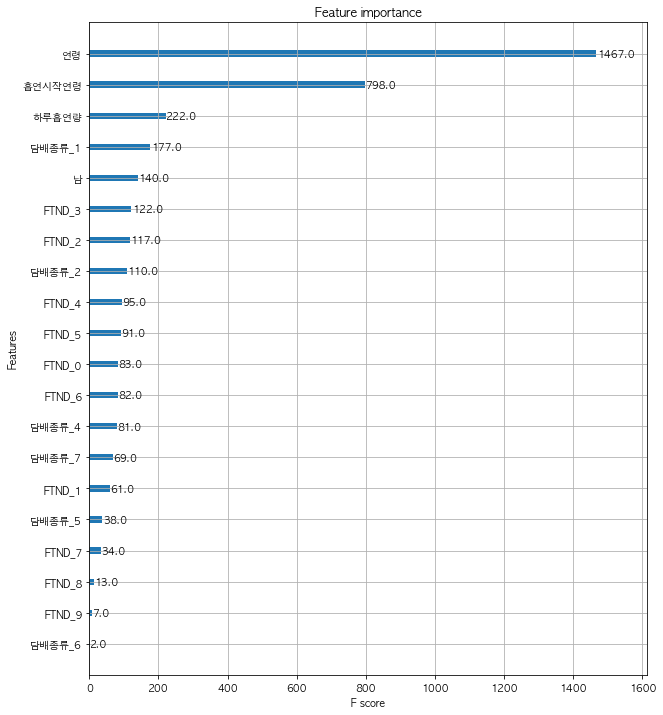

In [60]:
print('accuracy :', accuracy)
from matplotlib import pyplot as plt
from matplotlib import rc
from xgboost import plot_importance

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(model, ax=ax)